## Importar librerías

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import math
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go



## Importar datos

In [3]:
df = pd.read_csv('datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)
df.training_times_last_year = df.training_times_last_year.astype(str)
df.columns

Index(['employee_id', 'age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'gender',
       'job_level', 'job_role', 'marital_status', 'monthly_income',
       'num_companies_worked', 'percent_salary_hike', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'years_at_company',
       'years_since_last_promotion', 'years_with_curr_manager',
       'environment_satisfaction', 'job_satisfaction', 'work_life_balance',
       'job_involvement', 'performance_rating', 'mean_time'],
      dtype='object')

In [24]:
df['distance_from_home'].dtype

dtype('int64')

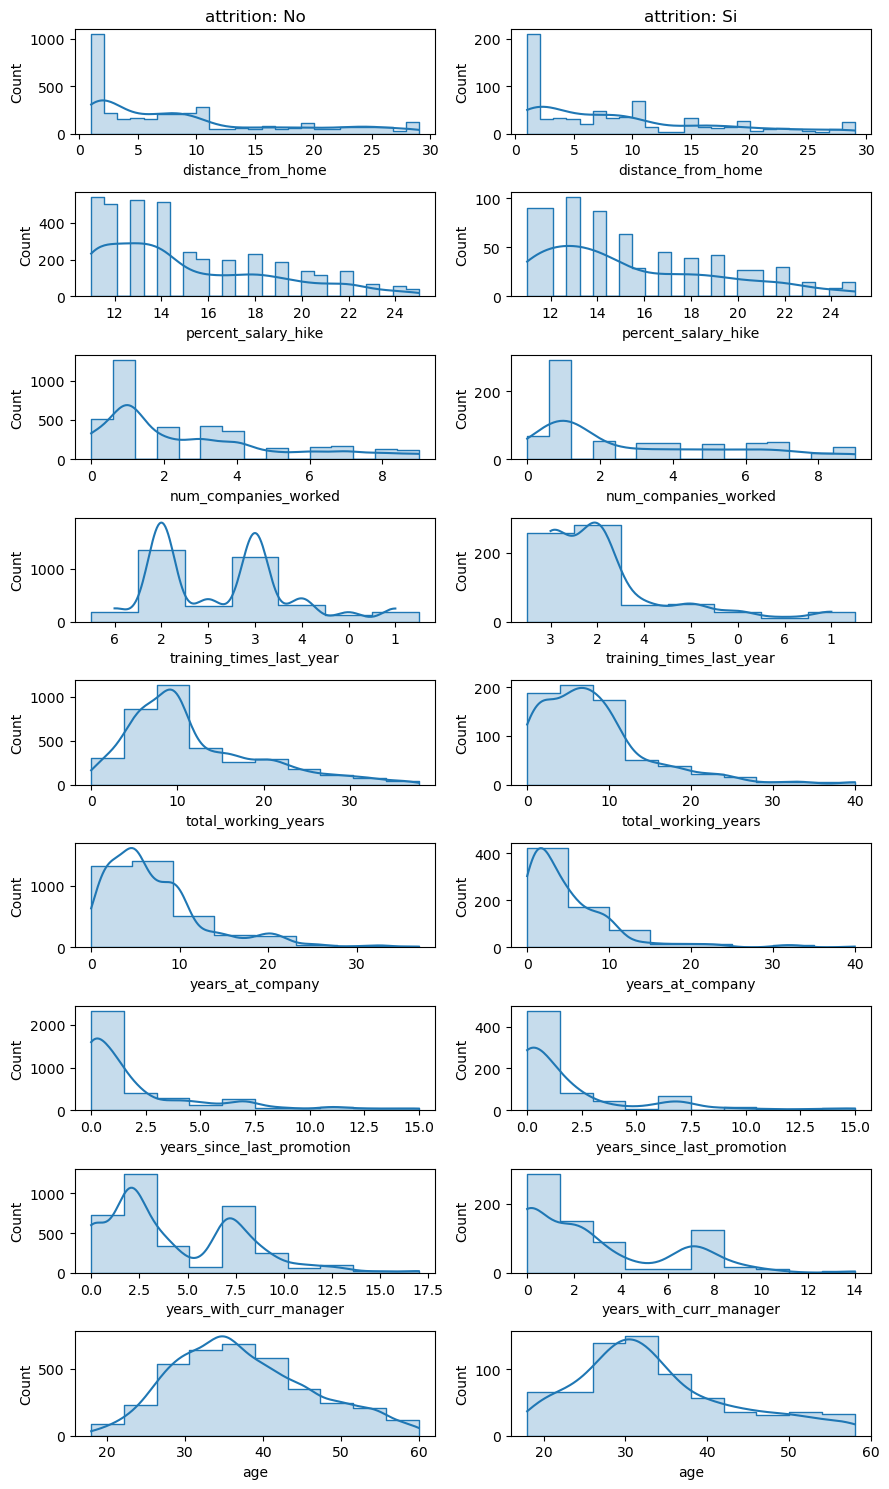

In [18]:
time_feat = df.loc[:, df.columns.str.contains('Years')].columns.values.tolist() + ['Age']  # Variables de tiempo

numerical_feat = ['distance_from_home', 'percent_salary_hike', 'num_companies_worked', 
                  'training_times_last_year', 'total_working_years', 'years_at_company', 
                  'years_since_last_promotion', 'years_with_curr_manager', 'age']                     # Variables numerica

continuos_feat = df[[i for i in df if df[i].nunique() > 100]].columns.values.tolist()     # Variables numericas continuas

# Variables categoricas
categorical_feat = df.columns.values[~np.isin(df.columns.values.tolist(), continuos_feat+numerical_feat)].tolist()

# Lista con todas las variables numericas
ndata =  numerical_feat

# Histograma para las variables numericas continuas

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(9,15))

bins = [25]*2 + [15]*2 + [10] + [8] + [10]*3 + [10] + [25]


for i,j,k,b in zip(axes, [df['attrition'].unique()]*11, ndata, bins):

    sns.histplot(ax=i[0], data=df[df['attrition'] == j[0]], x=k, bins=b, kde=True, hue='attrition', element="step", legend=None)
    sns.histplot(ax=i[1], data=df[df['attrition'] == j[1]], x=k, bins=b, kde=True, hue='attrition', element="step", legend=None)

axes[0][0].set_title('attrition: No')
axes[0][1].set_title('attrition: Si')
plt.tight_layout()
plt.show()

In [15]:
# Boxplots para las variables numericas para identificar valores atipicos



data = df[numerical_feat].copy()
_ = ndata.copy()

for z in range(3):
    cols = 3
    rows = 1
    fig = make_subplots(cols=cols, rows=rows)

    for j,k in zip(range(1, cols+1), _[0:cols]):

        _.remove(k)

        fig.add_trace(go.Box(y=data[k], boxpoints='outliers',
                            fillcolor='blue', jitter=0.5,
                            whiskerwidth=0.2, name=k, width=800), row=1, col=j)
    fig.show()